In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ipo_scoop.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], skiprows=2, names=['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price', 'first_day_close', 'first_day_pctchg', 'dollar_change_open', 'dollar_change_close', 'star_rating', 'performed'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 294.6+ KB


### There appeared to be a bunch of blank rows at the bottom of the dataframe, so I dropped them. 

In [5]:
df = df.dropna(how = 'all')

In [6]:
df = df.applymap(lambda x: x if not '$' in str(x) else x.replace('$', ''))

In [7]:
df = df.applymap(lambda x: x if not '%' in str(x) else x.replace('%', ''))

In [8]:
df.tail()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
3118,12/8/00,Specialty Laboratories,SP,Merrill Lynch,16.00,21.94,23.31,45.70,5.94,7.31,3,NaN
3119,12/8/00,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.06,24.50,22.50,2.06,4.50,2,NaN
3120,12/11/00,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.00,13.38,25.12,1.31,2.69,1,NaN
3121,12/12/00,GenVec,GNVC,J.P. Morgan,9.50,10.56,9.88,3.95,1.06,0.38,2,NaN
3122,12/15/00,Resources Connection,RECN,Credit Suisse First Boston,12.00,13.63,16.00,33.33,1.63,4.00,2,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 3122
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 317.2+ KB


In [10]:
df.loc[1258, 'date'] = '2012-11-20'

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 3122
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 397.2+ KB


In [13]:
df['offer_price'] = df['offer_price'].astype('float')

In [14]:
df['open_price'] = df['open_price'].astype('float')
df['first_day_close'] = df['first_day_close'].astype('float')

In [15]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed'],
      dtype='object')

In [16]:
df.replace('N/C', 0, inplace=True)

In [17]:
for col in df.columns[4:11]:
    df[col] = df[col].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 3122
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 397.2+ KB


### Opening Day Change

In [19]:
df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

date
2000    35.562278
2001    12.761489
2002     7.247043
2003    11.945000
2004    10.703276
2005     9.910752
2006     9.988270
2007    11.521406
2008     2.318085
2009     7.175738
2010     8.654875
2011     9.044406
2012    11.981918
2013    16.352652
2014    12.363160
2015    13.947341
2016    10.979623
2017    10.537348
2018    14.417569
Name: first_day_pctchg, dtype: float64

In [20]:
mean_year_first = df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

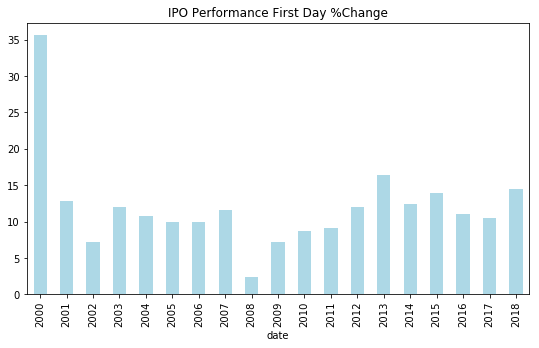

In [21]:
%matplotlib inline
mean_year_first.plot(kind = 'bar', color = 'lightblue', figsize = (9, 5), title = 'IPO Performance First Day %Change')

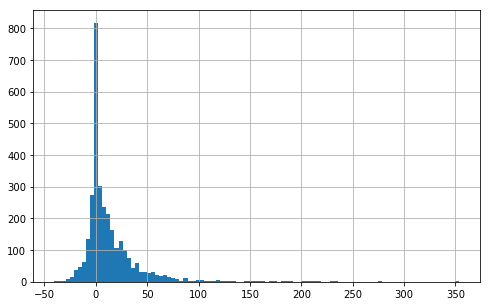

In [22]:
df.first_day_pctchg.hist(bins = 100, figsize = (8, 5))

In [23]:
df['dollar_chg_opencls'] = df['dollar_change_close'] - df['dollar_change_open']

In [24]:
df['pct_chg_opencls'] = (df['dollar_chg_opencls']/df['open_price']) * 100

In [25]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072


In [26]:
df.pct_chg_opencls.describe()

count    3123.000000
mean        1.347351
std        11.031025
min       -98.522167
25%        -2.870650
50%         0.000000
75%         4.000000
max       159.417476
Name: pct_chg_opencls, dtype: float64

In [27]:
df[df.pct_chg_opencls < -98]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
2218,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1.0,NaN,-6.0,-98.522167


### The above was one of Jacob's cells.  After seeing one stock that had a very high negative change between open and close, he did some EDA to see what was going on.  It became clear that one of the features calculated by S&P (or whoever) was populated improperly, so Jacob put the correct value in.

### After the EDA, I thought it made sense to recalculate the values for certain engineered features.  I then thought it made sense to look at all stocks for which pct_chg_opencls was roughly > 3 standard deviations from the mean since the histogram for performance looks relatively symmetrical.

In [28]:
df.loc[2218, 'dollar_change_open'] = 0.09

In [29]:
df['dollar_chg_opencls'] = df['dollar_change_close'] - df['dollar_change_open']

In [30]:
df['pct_chg_opencls'] = (df['dollar_chg_opencls']/df['open_price']) * 100

In [31]:
df.iloc[2218]

date                      2005-04-18 00:00:00
issuer                 Terra Nova Acquisition
symbol                                  TNVAU
managers                    EarlyBird Capital
offer_price                                 6
open_price                               6.09
first_day_close                          6.22
first_day_pctchg                         3.67
dollar_change_open                       0.09
dollar_change_close                      0.22
star_rating                                 1
performed                                 NaN
dollar_chg_opencls                       0.13
pct_chg_opencls                       2.13465
Name: 2218, dtype: object

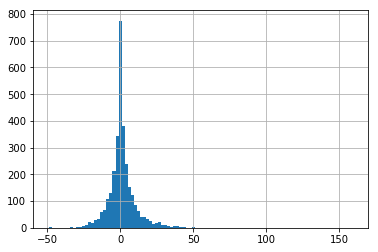

In [32]:
df.pct_chg_opencls.hist(bins= 100)

In [33]:
df[df.pct_chg_opencls < -33]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
892,2013-01-15,"USA Compression Partners, LP",USAC,"Barclays Capital/ Goldman, Sachs/ J.P. Morgan/...",18.00,17.50,11.66,-35.22,-0.50,-6.34,1.0,NaN,-5.84,-33.371429
1364,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,3.0,NaN,-24.23,-40.383333
1454,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1.0,NaN,-10.97,-49.281222
2577,2004-10-27,eLong,LONG,Deutsche Bank Securities,13.50,22.00,14.40,6.67,8.50,0.90,3.0,NaN,-7.60,-34.545455
3015,2000-08-09,Repeater Technologies,RPTR,US Bancorp Piper Jaffray,9.00,17.00,8.75,-2.78,8.00,-0.25,4.0,NaN,-8.25,-48.529412


### The poor performers don't appear to have any data problems. 

In [34]:
df[(df.pct_chg_opencls > 33)]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545
66,2018-05-24,Scholar Rock Holding,SRRK,Jefferies/ Cowen/ BMO Capital Markets,14.00,14.25,15.50,10.71,0.25,15.00,1.0,NaN,14.75,103.508772
84,2018-07-25,Bloom Energy,BE,J.P. Morgan/ Morgan Stanley/ Credit Suisse/ Ke...,15.00,18.70,25.00,66.67,3.70,10.00,2.0,NaN,6.30,33.689840
101,2018-01-25,Menlo Therapeutics,MNLO,Jefferies/ Piper Jaffray/ Guggenheim Securities,17.00,20.50,28.71,68.88,3.50,11.71,2.0,NaN,8.21,40.048780
172,2017-04-07,Okta,OKTA,"Goldman, Sachs/ J.P. Morgan Securities/ Allen ...",17.00,17.00,23.56,38.59,0.00,6.56,3.0,NaN,6.56,38.588235
262,2017-09-28,Nightstar Therapeutics,NITE,Jefferies/ Leerink Partners/ BMO Capital Markets,14.00,17.25,24.00,71.43,3.25,10.00,1.0,NaN,6.75,39.130435
264,2017-09-28,Roku,ROKU,Morgan Stanley/ Citigroup,14.00,15.78,23.50,67.86,1.78,9.50,2.0,NaN,7.72,48.922687
400,2016-09-30,Nutanix,NTNX,Goldman Sachs/ Morgan Stanley/ J.P. Morgan/ RB...,16.00,26.50,37.00,131.25,10.50,21.00,3.0,NaN,10.50,39.622642
507,2015-06-11,Axovant Sciences,AXON,Jefferies/ Evercore ISI/ RBC Capital Markets,15.00,20.93,29.90,99.33,5.93,14.90,3.0,NaN,8.97,42.857143
528,2015-06-26,Seres Therapeutics,MCRB,Goldman Sachs/ BofA Merrill Lynch,18.00,31.36,51.40,185.56,13.36,33.40,3.0,NaN,20.04,63.903061


###  There's a lot of records here, so I can probably do this programmatically. 

In [35]:
df['EDA_dollar_change_open'] = (df.open_price - df.offer_price)

In [36]:
df[df.EDA_dollar_change_open!=df.dollar_change_open][['issuer', 'offer_price', 'open_price', 'dollar_change_open', 'EDA_dollar_change_open']]

,issuer,offer_price,open_price,dollar_change_open,EDA_dollar_change_open
0,Farmmi,4.00,4.40,0.40,0.40
1,Senmiao Technology,4.00,5.51,1.51,1.51
2,Golden Bull,4.00,5.20,1.20,1.20
4,One Stop Systems,5.00,5.55,0.55,0.55
5,Genprex,5.00,4.64,-0.36,-0.36
6,HyreCar,5.00,5.55,0.55,0.55
9,Entera Bio Ltd.,8.00,7.30,-0.70,-0.70
11,Uxin Limited,9.00,10.40,1.40,1.40
16,MTech Acquisition,10.00,10.01,0.01,0.01
19,Platinum Eagle Acquisition,10.00,10.06,0.06,0.06


# So, the above is confusing as hell.  It took me quite a while to figure out that boolean indexing wasn't working due to imperfect floating point precision.  Below is a solution that (in this case) completely solves the problem.

In [37]:
df[abs(df.dollar_change_open - df.EDA_dollar_change_open)>.000001]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open
1117,2013-12-13,Cheniere Energy Partners LP Holdings,CQH,Goldman Sachs/ Morgan Stanley/ Credit Suisse/ ...,20.00,19.65,19.22,-3.90,-0.36,-0.78,1.0,NaN,-0.42,-2.137405,-0.35
2842,2001-07-20,Natus Medical,BABY,Dain Rauscher Wessels,11.00,11.50,14.45,31.36,0.49,3.45,3.0,NaN,2.96,25.739130,0.50
2888,2000-05-18,Nogatech,NGTC,W.R. Hambrecht+Co,12.00,11.88,9.41,-21.61,-0.13,-2.59,1.0,NaN,-2.46,-20.707071,-0.12
2939,2000-07-11,Entegris,ENTG,Merrill Lynch,11.00,10.88,11.19,1.70,-0.13,0.19,1.0,NaN,0.32,2.941176,-0.12
2961,2000-07-25,Evoke,EVOK,Salomon Smith Barney,8.00,7.88,8.13,1.56,-0.13,0.13,1.0,NaN,0.26,3.299492,-0.12
2983,2000-08-02,eRoom System Technologies,ERMS,Donald,6.50,6.38,6.13,-5.77,-0.13,-0.38,1.0,NaN,-0.25,-3.918495,-0.12
2990,2000-08-03,Screaming Media.com,SCRM,Credit Suisse First Boston,12.00,11.13,10.50,-12.50,-0.88,-1.50,3.0,Missed,-0.62,-5.570530,-0.87
2999,2000-08-04,Innovative Solutions and Support,ISSC,Friedman Billings Ramsey,11.00,10.63,12.19,10.80,-0.38,1.19,2.0,NaN,1.57,14.769520,-0.37
3057,2000-09-28,ASUR,ASR,UBS Warburg,15.13,15.25,15.19,0.41,0.13,0.06,2.0,Missed,-0.07,-0.459016,0.12
3071,2000-10-04,New Skies Satellites NV,NSK,"Goldman, Sachs/Morgan Stanley Dean Witter",9.00,8.38,8.06,-10.42,-0.63,-0.94,2.0,Missed,-0.31,-3.699284,-0.62


### Since all of the "dollar_change_open" values are wrong, and my calculated ones are right, I'm just going to overwrite the dollar_change_open column.

### the other numeric fields might also be weird, so I'll take a look at df.describe() and see if there are any outliers, and then I'll investigate.

In [38]:
df['dollar_change_open'] = (df.open_price - df.offer_price)
df.drop('EDA_dollar_change_open', axis=1)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,0.0,NaN,-0.58,-11.153846
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1.0,NaN,-0.62,-12.400000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1.0,NaN,-0.67,-12.072072
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-6.00,-0.36,-0.30,1.0,NaN,0.06,1.293103
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,2.00,0.55,0.10,1.0,NaN,-0.45,-8.108108
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-19.00,-1.00,-0.95,1.0,NaN,0.05,1.250000
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,4.95,0.50,0.26,0.0,NaN,-0.24,-4.173913
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603


In [39]:
df.describe()

,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open
count,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,14.486407,16.470218,16.735181,13.151895,1.983810,2.254262,1.802754,0.270480,1.379582,1.983810
std,6.174436,8.888668,9.483730,27.342767,4.460818,5.405109,0.902785,2.312376,10.885217,4.460818
min,1.000000,1.150000,1.150000,-41.080000,-6.850000,-6.340000,0.000000,-24.230000,-49.281222,-6.850000
25%,10.000000,10.100000,10.110000,0.000000,0.000000,0.000000,1.000000,-0.450000,-2.860242,0.000000
50%,14.000000,15.000000,15.030000,4.550000,0.500000,0.550000,2.000000,0.000000,0.000000,0.500000
75%,18.000000,20.180000,20.625000,19.065000,2.500000,2.880000,3.000000,0.620000,4.000000,2.500000
max,91.000000,120.000000,132.990000,353.850000,65.000000,95.540000,5.000000,56.540000,159.417476,65.000000


In [40]:
df[abs(df.first_day_pctchg)>19]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545,0.40
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441,1.51
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603,-0.70
26,2018-04-27,Goosehead Insurance,GSHD,J.P. Morgan/ BofA Merrill Lynch,10.00,12.00,15.75,57.50,2.00,5.75,1.0,NaN,3.75,31.250000,2.00
53,2018-05-11,HUYA,HUYA,Credit Suisse/ Goldman Sachs (Asia)/ UBS Inves...,12.00,15.50,16.06,33.83,3.50,4.06,2.0,NaN,0.56,3.612903,3.50
61,2018-06-21,i3 Verticals,IIIV,Cowen/ Raymond James/ KeyBanc Capital Markets,13.00,18.00,18.35,41.15,5.00,5.35,3.0,NaN,0.35,1.944444,5.00
64,2018-04-12,Zuora,ZUO,Goldman Sachs/ Morgan Stanley/ Allen & Company...,14.00,20.00,20.00,42.86,6.00,6.00,3.0,NaN,0.00,0.000000,6.00
65,2018-05-23,EVO Payments,EVOP,J.P. Morgan/ BofA Merrill Lynch/ Citigroup/ De...,14.00,20.50,19.02,35.86,6.50,5.02,3.0,NaN,-1.48,-7.219512,6.50
73,2018-04-27,Smartsheet,SMAR,Morgan Stanley/ J.P. Morgan/ Jefferies/ RBC Ca...,15.00,18.40,19.50,30.00,3.40,4.50,3.0,NaN,1.10,5.978261,3.40
74,2018-05-17,Pluralsight,PS,Morgan Stanley/ J.P. Morgan/ Barclays/ BofA Me...,15.00,20.00,20.00,33.33,5.00,5.00,3.0,NaN,0.00,0.000000,5.00


### I think the above output confirms that the data is more or less clean.  If I were doing this for a "production" project, I would spend a lot more time with the data

### Feature Engineering



In [41]:
sp = pd.read_csv('SPY.csv')

In [42]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700


In [43]:
sp.sort_values('Date', inplace = True)
sp.reset_index(drop= True, inplace = True)

In [44]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700


In [45]:
sp['day_ago'] = sp.Date.shift(periods=1)
sp['week_ago'] = sp.Date.shift(periods = 7)

In [46]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN


In [47]:
sp['day_ago_close'] = sp.Close.shift(periods = 1)

In [48]:
sp['week_ago_close'] = sp.Close.shift(periods = 7)

In [49]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN


In [50]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
Date              24 non-null object
Open              24 non-null float64
High              24 non-null float64
Low               24 non-null float64
Close             24 non-null float64
Adj Close         24 non-null float64
Volume            24 non-null int64
day_ago           23 non-null object
week_ago          17 non-null object
day_ago_close     23 non-null float64
week_ago_close    17 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ KB


In [51]:
sp['chg'] = ((sp.day_ago_close - sp.week_ago_close)/sp.week_ago_close) * 100

In [52]:
sp.chg.describe()

count    17.000000
mean      0.436672
std       0.882171
min      -1.330621
25%      -0.259985
50%       0.403274
75%       1.144198
max       2.011064
Name: chg, dtype: float64

In [53]:
sp.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close,chg
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN,NaN
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600,2018-07-20,NaN,279.679993,NaN,NaN
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900,2018-07-23,NaN,280.200012,NaN,NaN
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900,2018-07-24,2018-07-16,281.609985,279.339996,0.812626
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500,2018-07-25,2018-07-17,284.010010,280.470001,1.262170
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700,2018-07-26,2018-07-18,283.339996,281.059998,0.811214


In [67]:
df['sp_close_open_chg_pct'] = sp.chg

In [68]:
df['sp_close_open_chg_pct'].describe()

count    17.000000
mean      0.436672
std       0.882171
min      -1.330621
25%      -0.259985
50%       0.403274
75%       1.144198
max       2.011064
Name: sp_close_open_chg_pct, dtype: float64

In [69]:
df.head(10)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open,sp_close_open_chg_pct,lead_mgr,gap_open_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545,0.40,NaN,viewtrade securities,9.090909
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441,1.51,NaN,viewtrade securities,27.404719
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,0.0,NaN,-0.58,-11.153846,1.20,NaN,viewtrade securities,23.076923
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1.0,NaN,-0.67,-12.072072,0.55,NaN,Roth Capital Partners,9.909910
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-6.00,-0.36,-0.30,1.0,NaN,0.06,1.293103,-0.36,NaN,Network 1 Financial Securities,-7.758621
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,2.00,0.55,0.10,1.0,NaN,-0.45,-8.108108,0.55,NaN,Network 1 Financial Securities,9.909910
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-19.00,-1.00,-0.95,1.0,NaN,0.05,1.250000,-1.00,0.812626,Joseph Gunnar & Co.,-25.000000
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,4.95,0.50,0.26,0.0,NaN,-0.24,-4.173913,0.50,1.262170,Benchmark,8.695652
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603,-0.70,0.811214,Maxim Group,-9.589041


In [70]:
df.managers[:10]

0              ViewTrade Securities
1              ViewTrade Securities
2              ViewTrade Securities
3        Piper Jaffray/ Oppenheimer
4             Roth Capital Partners
5    Network 1 Financial Securities
6    Network 1 Financial Securities
7               Joseph Gunnar & Co.
8                Benchmark/ Cuttone
9                      Maxim Group 
Name: managers, dtype: object

In [71]:
df['lead_mgr'] = df['managers'].astype('str').map(lambda x:x.split('/')[0])

In [72]:
df['lead_mgr'].head()

0     ViewTrade Securities
1     ViewTrade Securities
2     ViewTrade Securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [73]:
df.loc[df['lead_mgr'].str.contains('ViewTrade'), 'lead_mgr'] = 'viewtrade securities'

In [74]:
df['lead_mgr'].head()

0     viewtrade securities
1     viewtrade securities
2     viewtrade securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [75]:
df.lead_mgr.unique()[:5]

array(['viewtrade securities', 'Piper Jaffray', 'Roth Capital Partners',
       'Network 1 Financial Securities', 'Joseph Gunnar & Co.'], dtype=object)

In [76]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'EDA_dollar_change_open', 'sp_close_open_chg_pct',
       'lead_mgr', 'gap_open_pct'],
      dtype='object')

In [77]:
df['gap_open_pct'] = (df['dollar_change_open'].astype('float')/df['open_price'].astype('float'))*100

In [79]:
df.drop('sp_close_open_chg_pct', axis=1)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open,lead_mgr,gap_open_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,0.0,NaN,1.78,40.454545,0.40,viewtrade securities,9.090909
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1.0,Missed,0.05,0.907441,1.51,viewtrade securities,27.404719
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,0.0,NaN,-0.58,-11.153846,1.20,viewtrade securities,23.076923
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00,Piper Jaffray,0.000000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1.0,NaN,-0.67,-12.072072,0.55,Roth Capital Partners,9.909910
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-6.00,-0.36,-0.30,1.0,NaN,0.06,1.293103,-0.36,Network 1 Financial Securities,-7.758621
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,2.00,0.55,0.10,1.0,NaN,-0.45,-8.108108,0.55,Network 1 Financial Securities,9.909910
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-19.00,-1.00,-0.95,1.0,NaN,0.05,1.250000,-1.00,Joseph Gunnar & Co.,-25.000000
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,4.95,0.50,0.26,0.0,NaN,-0.24,-4.173913,0.50,Benchmark,8.695652
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-21.50,-0.70,-1.72,0.0,NaN,-1.02,-13.972603,-0.70,Maxim Group,-9.589041


In [80]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open,sp_close_open_chg_pct,lead_mgr,gap_open_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0.40,NaN,viewtrade securities,9.090909
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,1.51,NaN,viewtrade securities,27.404719
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1.20,NaN,viewtrade securities,23.076923
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,0.55,NaN,Roth Capital Partners,9.909910


In [81]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'EDA_dollar_change_open', 'sp_close_open_chg_pct',
       'lead_mgr', 'gap_open_pct'],
      dtype='object')

In [82]:
df['month'] = df.date.dt.month

In [83]:
df.month[:5]

0    2
1    3
2    3
3    2
4    2
Name: month, dtype: int64

In [84]:
df['day'] = df.date.dt.dayofweek

In [85]:
df['day'][:5]

0    4
1    4
2    1
3    2
4    3
Name: day, dtype: int64

In [86]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open,sp_close_open_chg_pct,lead_mgr,gap_open_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0.40,NaN,viewtrade securities,9.090909,2,4
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,1.51,NaN,viewtrade securities,27.404719,3,4
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1.20,NaN,viewtrade securities,23.076923,3,1
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000,2,2
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,0.55,NaN,Roth Capital Partners,9.909910,2,3


In [87]:
df['day'] = df.day.map({1: 'mon', 2: 'tues', 3: 'weds', 4:'thurs', 5:'fri'   })

In [88]:
df['month'] = df.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

In [89]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,EDA_dollar_change_open,sp_close_open_chg_pct,lead_mgr,gap_open_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,0.40,NaN,viewtrade securities,9.090909,feb,thurs
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,1.51,NaN,viewtrade securities,27.404719,mar,thurs
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,1.20,NaN,viewtrade securities,23.076923,mar,mon
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,0.00,NaN,Piper Jaffray,0.000000,feb,tues
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,0.55,NaN,Roth Capital Partners,9.909910,feb,weds


### Feature Selection

In [90]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'EDA_dollar_change_open', 'sp_close_open_chg_pct',
       'lead_mgr', 'gap_open_pct', 'month', 'day'],
      dtype='object')

In [91]:
X = pd.get_dummies(df[['month', 'day', 'gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price', 'dollar_chg_opencls']], drop_first = True)

In [92]:
X.head(10)

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
0,9.090909,0.40,4.00,4.40,1.78,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,27.404719,1.51,4.00,5.51,0.05,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,23.076923,1.20,4.00,5.20,-0.58,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.000000,0.00,5.00,5.00,-0.62,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,9.909910,0.55,5.00,5.55,-0.67,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,-7.758621,-0.36,5.00,4.64,0.06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,9.909910,0.55,5.00,5.55,-0.45,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,-25.000000,-1.00,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.50,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.70,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [93]:
X.shape

(3123, 20)

In [94]:
X = X[7:]

In [95]:
X.shape

(3116, 20)

In [96]:
X.head()

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
7,-25.000000,-1.0,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.5,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.7,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10,5.555556,0.5,8.50,9.00,-0.20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,13.461538,1.4,9.00,10.40,-0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [97]:
X.isnull().sum()

gap_open_pct          0
dollar_change_open    0
offer_price           0
open_price            0
dollar_chg_opencls    0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sept            0
day_mon               0
day_thurs             0
day_tues              0
day_weds              0
dtype: int64

In [98]:
X.dropna().shape

(3116, 20)

In [99]:
X = X.dropna()

In [100]:
X.columns

Index(['gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price',
       'dollar_chg_opencls', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sept', 'day_mon', 'day_thurs',
       'day_tues', 'day_weds'],
      dtype='object')

### Binary Classification

In [101]:
y = X.dollar_chg_opencls
X = X.drop('dollar_chg_opencls', axis = 1)

X_train, X_test = X[:2800], X[2800:]

In [102]:
X_test.shape

(316, 19)

In [103]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 2807 to 3122
Data columns (total 19 columns):
gap_open_pct          316 non-null float64
dollar_change_open    316 non-null float64
offer_price           316 non-null float64
open_price            316 non-null float64
month_aug             316 non-null uint8
month_dec             316 non-null uint8
month_feb             316 non-null uint8
month_jan             316 non-null uint8
month_jul             316 non-null uint8
month_jun             316 non-null uint8
month_mar             316 non-null uint8
month_may             316 non-null uint8
month_nov             316 non-null uint8
month_oct             316 non-null uint8
month_sept            316 non-null uint8
day_mon               316 non-null uint8
day_thurs             316 non-null uint8
day_tues              316 non-null uint8
day_weds              316 non-null uint8
dtypes: float64(4), uint8(15)
memory usage: 17.0 KB


In [104]:
y[:10]

7     0.05
8    -0.24
9    -1.02
10   -0.20
11   -0.73
12    0.00
13   -0.07
14    0.00
15    0.00
16    0.06
Name: dollar_chg_opencls, dtype: float64

In [105]:
y = y.map(lambda x: 1 if x > 1 else 0)

In [106]:
y_train = y[:2800]
y_test = y[2800:]

In [107]:
y_test.shape

(316,)

In [108]:
y_train[:10]

7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: dollar_chg_opencls, dtype: int64

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
clf.score(X_test, y_test)

0.69620253164556967